In [1]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os

%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
X_train_full.shape


(60000, 28, 28)

In [4]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

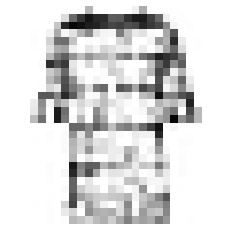

In [6]:
plt.imshow(X_train[10], cmap="binary")
plt.axis('off')
plt.show()

In [7]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [8]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [10]:
class_names[y_train[10]]

'T-shirt/top'

In [11]:
X_valid.shape
X_test.shape

(10000, 28, 28)

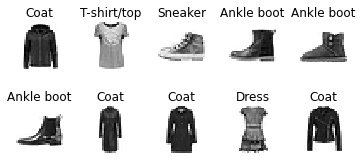

In [13]:
n_rows = 2
n_cols = 5
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.4, hspace=0.8)
plt.show()

In [14]:
model_multiclass = keras.models.Sequential()
model_multiclass.add(keras.layers.Flatten(input_shape=[28, 28]))
model_multiclass.add(keras.layers.Dense(300, activation="relu"))
model_multiclass.add(keras.layers.Dense(100, activation="relu"))
model_multiclass.add(keras.layers.Dense(10, activation="softmax"))

In [15]:
model_multiclass.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


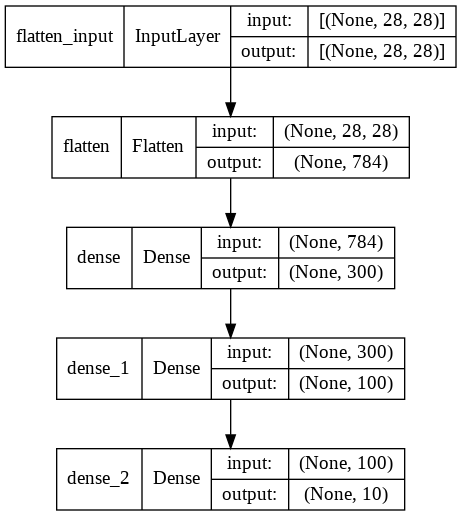

In [16]:
keras.utils.plot_model(model_multiclass, "conchita_multiclass_model.png", show_shapes=True)

In [17]:
model_multiclass.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [18]:
history = model_multiclass.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7054 - accuracy: 0.7680 - val_loss: 0.5146 - val_accuracy: 0.8228
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4880 - accuracy: 0.8301 - val_loss: 0.4853 - val_accuracy: 0.8286
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4436 - accuracy: 0.8444 - val_loss: 0.4647 - val_accuracy: 0.8400
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4168 - accuracy: 0.8543 - val_loss: 0.4158 - val_accuracy: 0.8568
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3973 - accuracy: 0.8606 - val_loss: 0.4007 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3808 - accuracy: 0.8656 - val_loss: 0.3791 - val_accuracy: 0.8660
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3663 - accuracy: 0.8709 - val_loss: 0.3676 - val_accuracy:

In [19]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

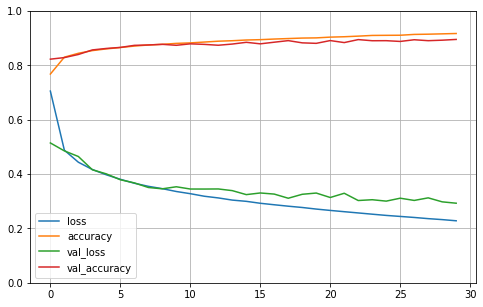

In [20]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [21]:
model_multiclass.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3224 - accuracy: 0.8869


[0.3224092423915863, 0.886900007724762]

In [22]:
X_new = X_test[:3]
y_proba = model_multiclass.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.02, 0.  , 0.97],
       [0.  , 0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

In [23]:
classes_y=np.argmax(y_proba,axis=1)

In [24]:
np.array(class_names)[classes_y]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [25]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

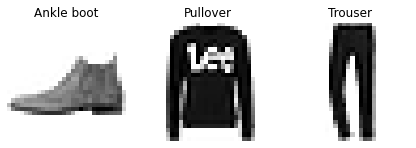

In [26]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()